In [4]:
## Let us Import the Necessary Libraries
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# let us fix Warnings if there are any
import warnings
warnings.filterwarnings('ignore')

In [6]:
# let us Load the DataFrame
df = pd.read_csv('telco_churn.csv')

In [7]:
# here is the preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# First Let us do the Data Inspection

In [9]:
# How Many Records Are There ?

In [10]:
# Which Column is Having the Most Missing Values ?

In [11]:
len(df)

7043

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df[['gender','tenure','Contract','MonthlyCharges','TotalCharges','Churn']].head()

,gender,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,1,Month-to-month,29.85,29.85,No
1,Male,34,One year,56.95,1889.5,No
2,Male,2,Month-to-month,53.85,108.15,Yes
3,Male,45,One year,42.30,1840.75,No
4,Female,2,Month-to-month,70.70,151.65,Yes


In [14]:
df['Contract'].unique().tolist()

['Month-to-month', 'One year', 'Two year']

In [15]:
# Target Column : 'Churn' : it explain if the customer has Left the Company or NOT
# 'No': Customer is still using Telecom Service
# 'Yes': Customer Has Left the Telcom Network or Service

In [16]:
# Objective: to explore Data and Use Visualization to Understand the Various Factors that could
#            be the possible Reason for Porting Out of Network.

In [17]:
# DataType Checking

# Did u check the Datatype of 'TotalCharges' Field(column) , is it Correct? if not
# what is the Suggested DataType ?

In [18]:
df['TotalCharges'].head(3)

0     29.85
1    1889.5
2    108.15
Name: TotalCharges, dtype: object

In [19]:
df.TotalCharges.dtype

dtype('O')

# let us Fix the Data Type 
<hr/>

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') #coerce changes Abnormal Values  to NaN

In [21]:
# ## Analysis

#     Univariate 
    
#         - Categorical
#         - Continous
    
#     Bivariate
    
#         - Categorical Categorical
#         - Categorical Continous 
#         - Continous Continous


In [22]:
# Our Target Column is 'CHURN'

In [23]:
# let us find the Data Imbalance%age

In [24]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [25]:
len(df)

7043

In [26]:
df.Churn.value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

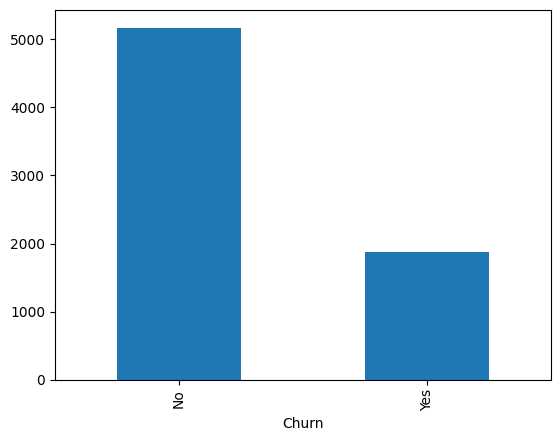

In [27]:
df.Churn.value_counts().plot(kind='bar');

In [28]:
# Here is a Strategy to Analyse Data

# we will Create 2 DataFrame from Master DataFrame

# df_yes = This DataFrame will Contain only Records of People Who Left the Network

# df_no = This DataFrame will contain Only Records of People who are still using Network Service.

# Later

# we will Compare the behaviour of This People and Find the pattern/trend/insights from Data
# using Visualisation!!

In [29]:
# Here are the splits

df_yes = df [ df.Churn == 'Yes']

df_no = df[ df.Churn == 'No' ]

In [30]:
# confirming
df_yes.Churn.head()

2     Yes
4     Yes
5     Yes
8     Yes
13    Yes
Name: Churn, dtype: object

In [31]:
df_no.Churn.head()

0    No
1    No
3    No
6    No
7    No
Name: Churn, dtype: object

## Let us Observe the Monthly Spending Habbits of Customers
<hr/>

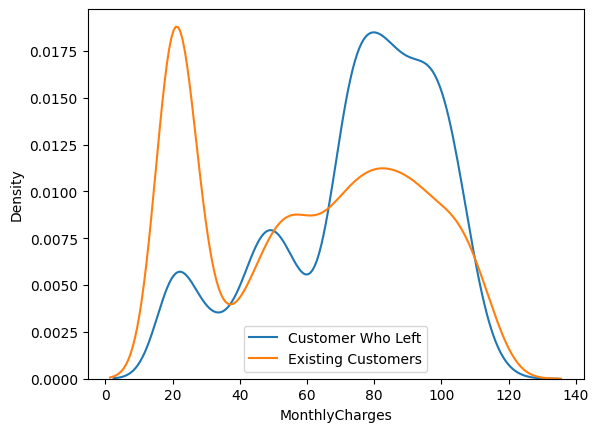

In [32]:
sns.distplot(df_yes['MonthlyCharges'] ,label ='Customer Who Left' , hist=False)
sns.distplot(df_no['MonthlyCharges'] ,label ='Existing Customers', hist=False )
plt.legend()
plt.show()

In [33]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

## Let us Observe the Contract Type Purchase / Used By Customers
<hr/>

In [34]:
df.Contract.unique().tolist()

['Month-to-month', 'One year', 'Two year']

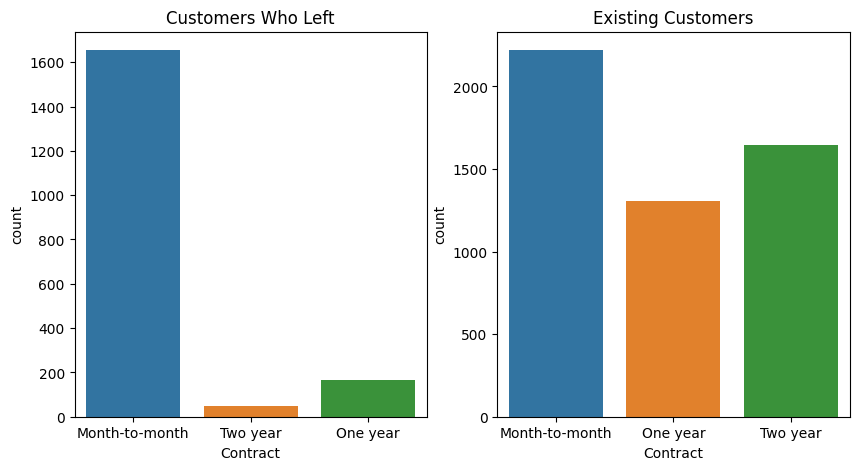

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Customers Who Left')
sns.countplot(x='Contract',data=df_yes) # when to use Count Plot  , when u wish to find Frequency Z

plt.subplot(1,2,2)
plt.title('Existing Customers')
sns.countplot(x='Contract',data=df_no)

plt.show()

## Bivariate Analysis
<hr/>

Contract Vs Monthly Charges


Let us Explore the Spending Patterns across Various Contract Types


In [36]:
# BoxPlot : Please Note: Box Plot is not used to Find Reasons , it is primarly used to Observe
#         the Distribution or Spread of Data.

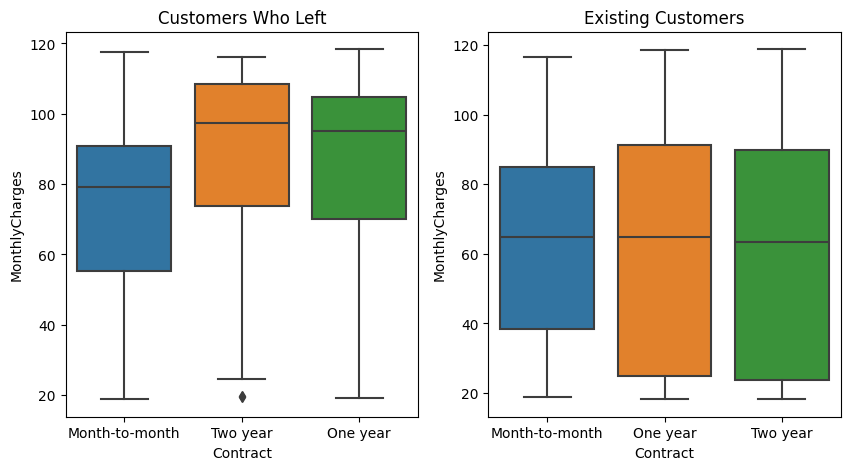

In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Customers Who Left')
sns.boxplot( x='Contract', y ='MonthlyCharges', data=df_yes)

plt.subplot(1,2,2)
plt.title('Existing Customers')
sns.boxplot( x='Contract', y ='MonthlyCharges', data=df_no)
plt.show()

# Hue

Let us See if Gender Have an Impact on Data 
<hr/>

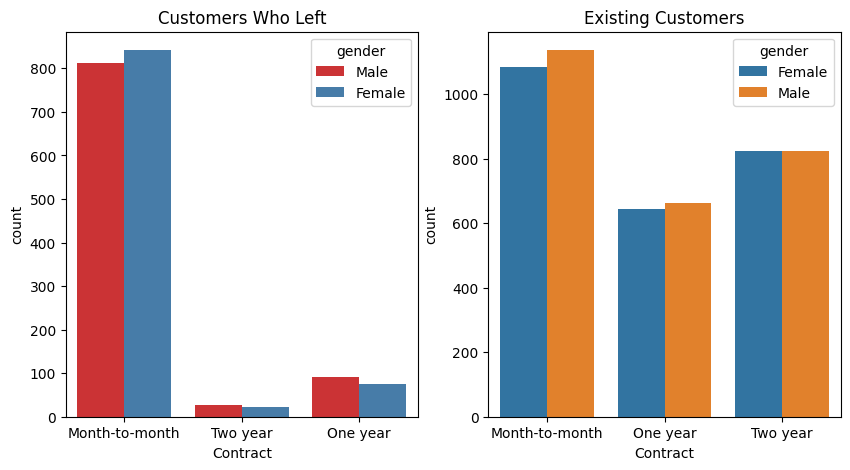

In [38]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Customers Who Left')
sns.countplot(x='Contract',hue='gender',data=df_yes,palette='Set1') # when to use Count Plot  , when u wish to find Frequency Z

plt.subplot(1,2,2)
plt.title('Existing Customers')
sns.countplot(x='Contract',hue='gender',data=df_no)

plt.show()

# Let us Observe the Tenure Factor
<hr/>

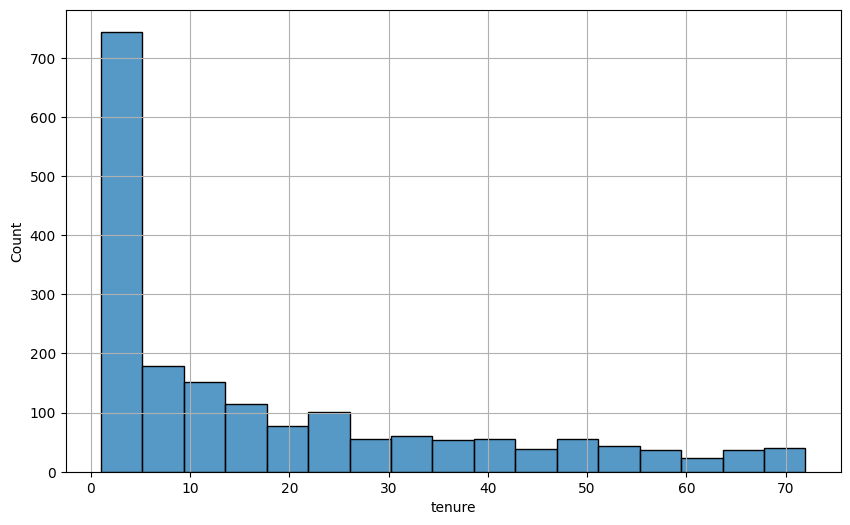

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df_yes['tenure'])
plt.grid()
plt.show()

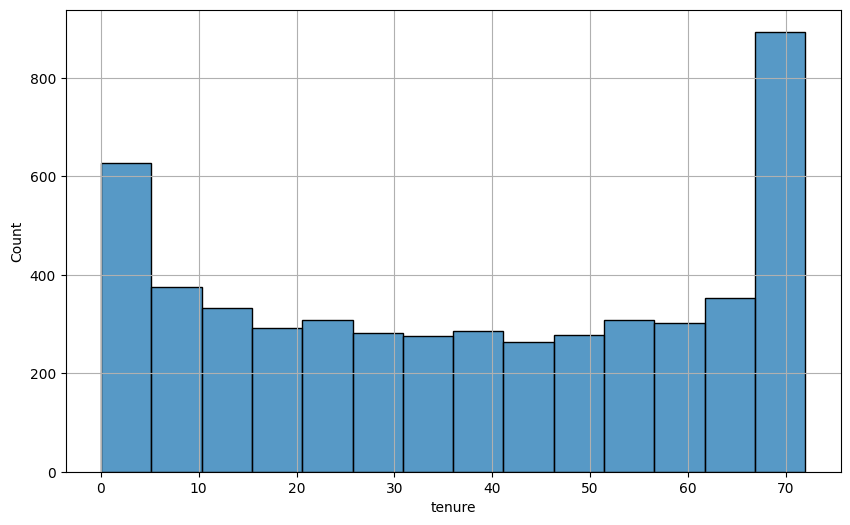

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df_no['tenure'])
plt.grid()
plt.show()